In [18]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute,__version__,compile,Aer,IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit.tools import visualization
from qiskit.tools.monitor import job_monitor,backend_monitor
import time
import numpy as np
from pprint import pprint
import pdflatex
%matplotlib inline

In [19]:
# Import your API

import sys, getpass
try:
    sys.path.append("../../") # go to parent dir
    import Qconfig
    qx_config = {
        "APItoken": Qconfig.APItoken,
        "url": Qconfig.config['url']}
    print('Qconfig loaded from %s.' % Qconfig.__file__)
except:
    APItoken = getpass.getpass('Please input your token and hit enter: ')
    qx_config = {
        "APItoken": APItoken,
        "url":"https://quantumexperience.ng.bluemix.net/api"}
    print('Qconfig.py not found in qiskit-tutorial directory; Qconfig loaded using user input.')

Qconfig loaded from C:\Users\yuluwang\Documents\APS Meeting\Qconfig.py.


In [20]:
# Show the list of real quantum computers

IBMQ.enable_account(qx_config['APItoken'], qx_config['url'])
IBMQ.backends()

d:\ProgramData\Anaconda3\lib\site-packages\qiskit\providers\ibmq\ibmqprovider.py:251: UserWarning: Credentials are already in use.
  warnings.warn('Credentials are already in use.')


[<IBMQBackend('ibmqx4') from IBMQ()>,
 <IBMQBackend('ibmqx2') from IBMQ()>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ()>,
 <IBMQBackend('ibmq_qasm_simulator') from IBMQ()>]

In [21]:
Aer.backends()

[<QasmSimulator('qasm_simulator') from AerProvider()>,
 <StatevectorSimulator('statevector_simulator') from AerProvider()>,
 <UnitarySimulator('unitary_simulator') from AerProvider()>]

In [22]:
# Check machine state

for i in IBMQ.backends():
    pprint(i.status())

BackendStatus(backend_name='ibmqx4', backend_version='1.0.0', operational=True, pending_jobs=7, status_msg='active')
BackendStatus(backend_name='ibmqx2', backend_version='1.0.0', operational=True, pending_jobs=1, status_msg='active')
BackendStatus(backend_name='ibmq_16_melbourne', backend_version='1.0.0', operational=True, pending_jobs=70, status_msg='active')
BackendStatus(backend_name='ibmq_qasm_simulator', backend_version='0.1.547', operational=True, pending_jobs=0, status_msg='active')


In [6]:
# Assign your backends

#backend = least_busy(IBMQ.backends(simulator=False))
backend = IBMQ.get_backend("ibmq_16_melbourne")            # run on real machine
backend_sim = Aer.get_backend('qasm_simulator') # run on local simulator by default

# N=4 Grover Search - Phase Oracle - Qubits: 2, 3, 4, 11 - Iterations: 3

In [7]:
def cccz(a,b,c,d):
    qc.cu1(np.pi/4, qr[a], qr[d])
    qc.cx(qr[a], qr[b])
    qc.cu1(-np.pi/4, qr[b], qr[d])
    qc.cx(qr[a], qr[b])
    qc.cu1(np.pi/4, qr[b], qr[d])
    qc.cx(qr[b], qr[c])
    qc.cu1(-np.pi/4, qr[c], qr[d])
    qc.cx(qr[a], qr[c])
    qc.cu1(np.pi/4, qr[c], qr[d])
    qc.cx(qr[b], qr[c])
    qc.cu1(-np.pi/4, qr[c], qr[d])
    qc.cx(qr[a], qr[c])
    qc.cu1(np.pi/4, qr[c], qr[d])

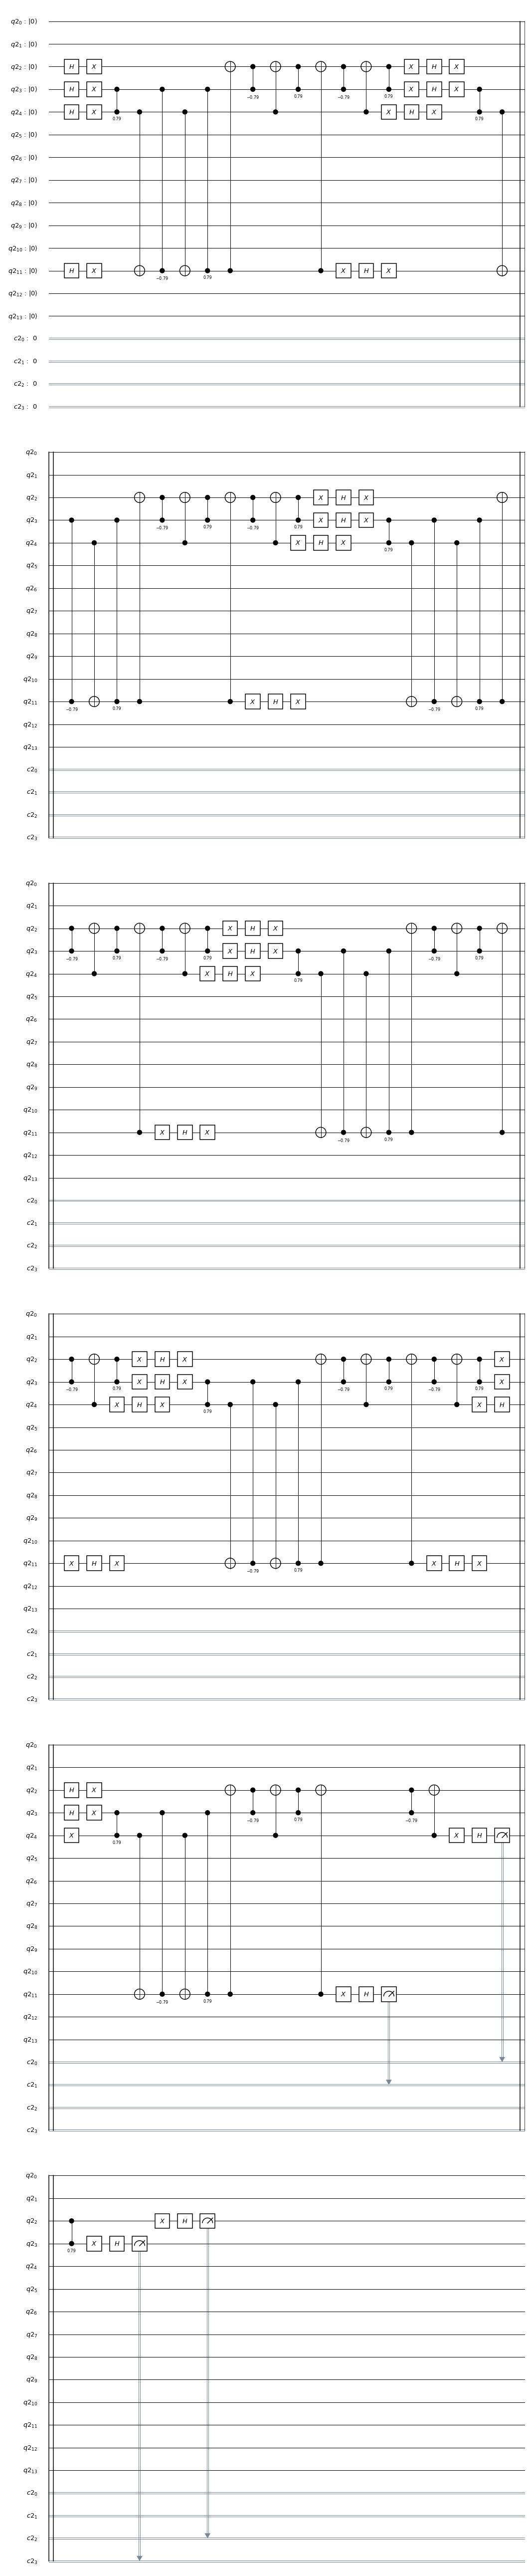

In [14]:
# N=4 Grover Search - Phase Oracle - Marked Item (0000) - Qubits: 2, 3, 4, 11 - Iterations: 3

qr = QuantumRegister(14)
cr = ClassicalRegister(4)
qc = QuantumCircuit(qr,cr)

# Initialization
qc.h(qr[4])
qc.h(qr[11])
qc.h(qr[2])
qc.h(qr[3])

# Oracle and Amplification
def repeat(): 
    # Oracle 
    qc.x(qr[4])
    qc.x(qr[11])
    qc.x(qr[2])
    qc.x(qr[3])
    
    # CCCZ
    cccz(4,11,2,3)
    
    qc.x(qr[4])
    qc.x(qr[11])
    qc.x(qr[2])
    qc.x(qr[3])
    
    # Amplification
    qc.h(qr[4])
    qc.h(qr[11])
    qc.h(qr[2])
    qc.h(qr[3])

    qc.x(qr[4])
    qc.x(qr[11])
    qc.x(qr[2])
    qc.x(qr[3])

    # CCCZ
    cccz(4,11,2,3)
    
    qc.x(qr[4])
    qc.x(qr[11])
    qc.x(qr[2])
    qc.x(qr[3])
    
    qc.h(qr[4])
    qc.h(qr[11])
    qc.h(qr[2])
    qc.h(qr[3])

for j in range(3):        
    repeat()


qc.measure(qr[4],cr[0])
qc.measure(qr[11],cr[1])
qc.measure(qr[2],cr[2])
qc.measure(qr[3],cr[3])

qc.draw(output ="mpl")

HTML(value="<p style='font-size:16px;'>Job Status: job is being initialized </p>")

Got a 502 code response to /api/Jobs/5c7498469b73ec0054c99a90/status: 502 Bad Gateway: Registered endpoint failed to handle the request.



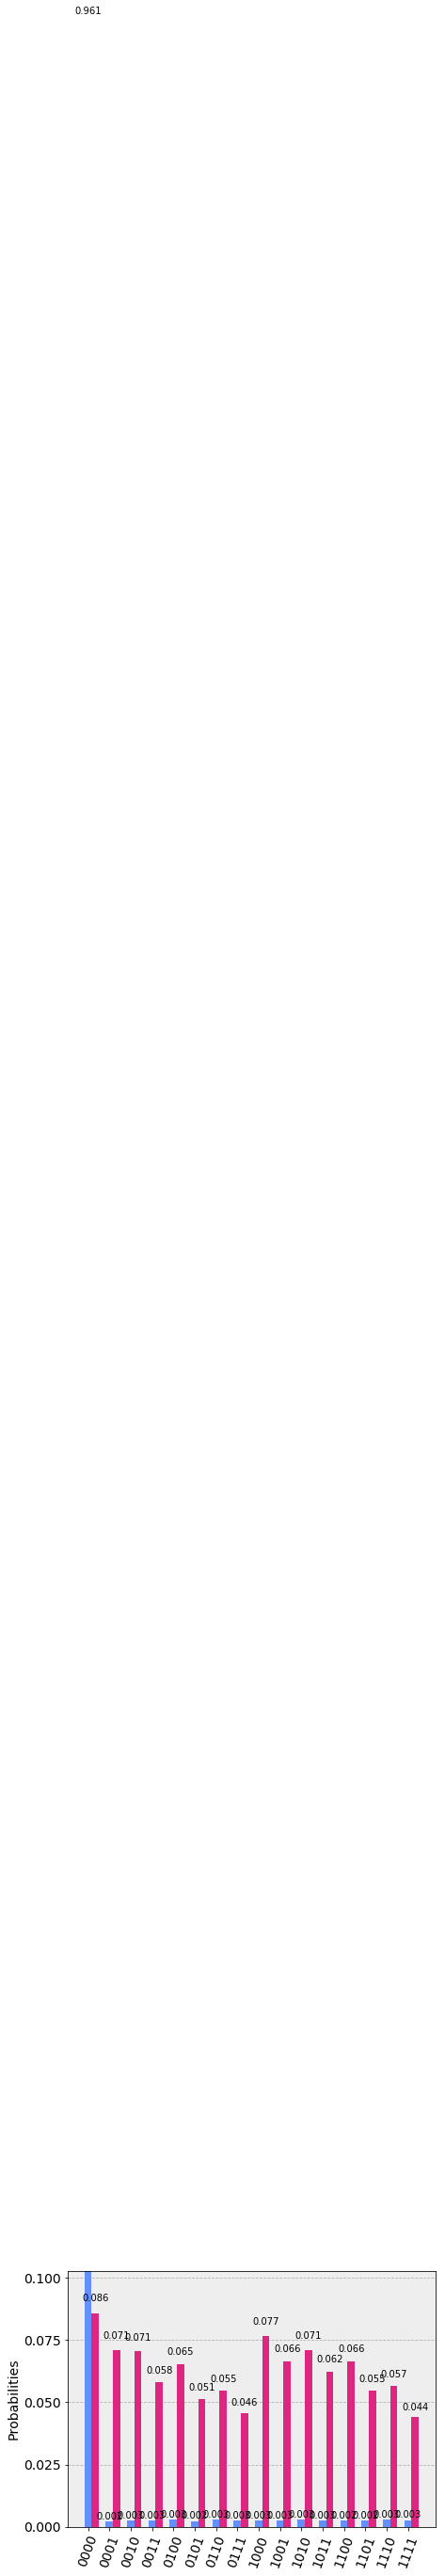

In [15]:
# Run in simulation
job = execute(qc, backend_sim, shots=100000)
result = job.result()
counts = result.get_counts(qc)

# Run on real quantum machine
job2 = execute(qc, backend, shots=8192, max_credits=3)
job_monitor(job2)
results2 = job2.result()
counts2 = results2.get_counts()

visualization.plot_histogram([counts,counts2])

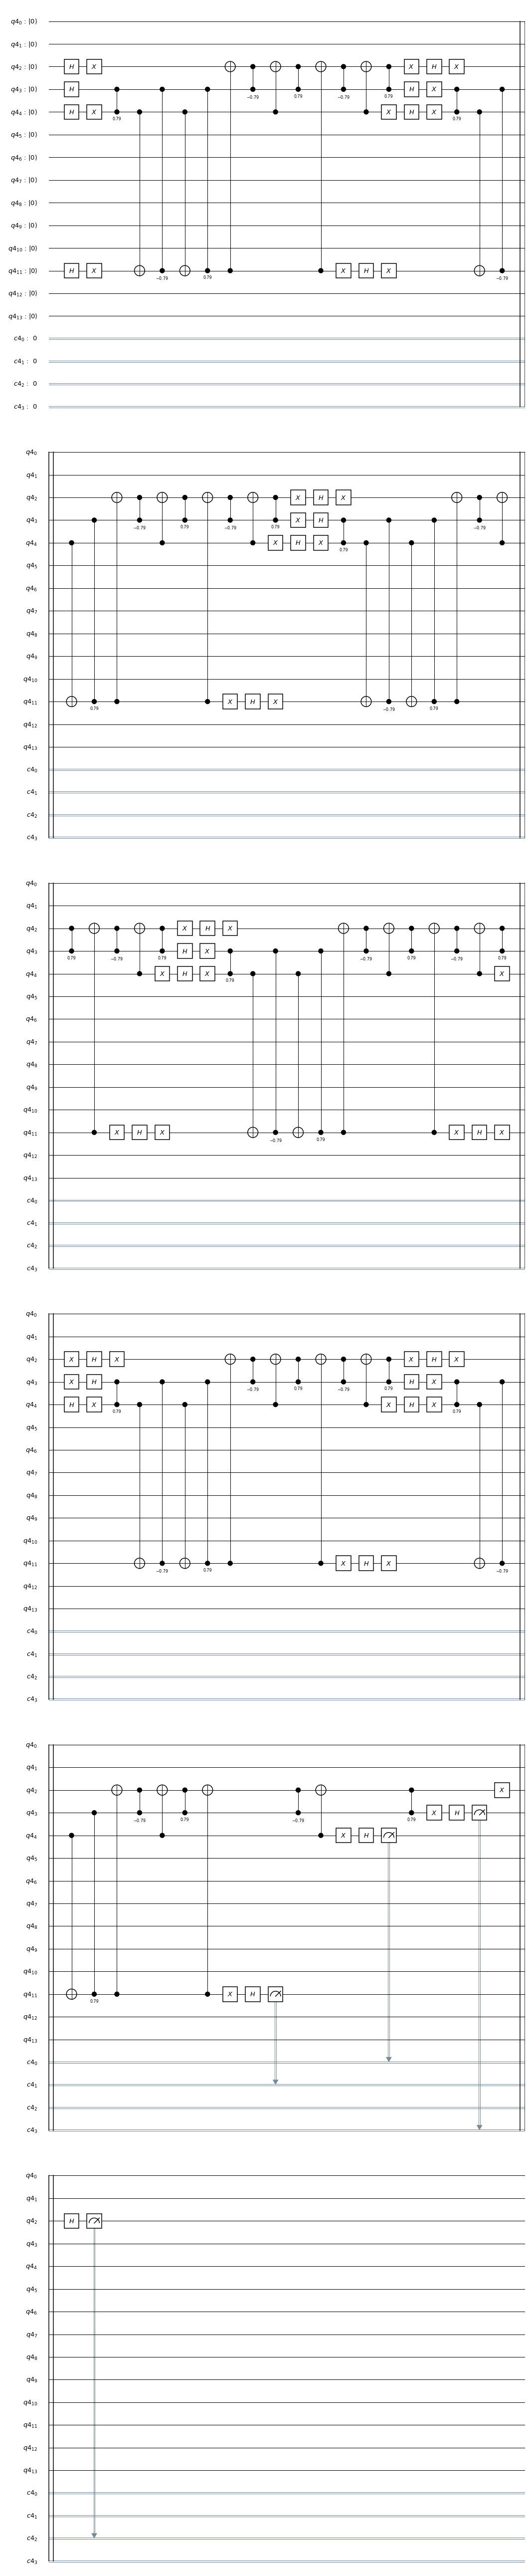

In [23]:
# N=4 Grover Search - Phase Oracle - Marked Item (0001) - Qubits: 2, 3, 4, 11 - Iterations: 3

qr = QuantumRegister(14)
cr = ClassicalRegister(4)
qc = QuantumCircuit(qr,cr)

# Initialization
qc.h(qr[4])
qc.h(qr[11])
qc.h(qr[2])
qc.h(qr[3])

# Oracle and Amplification
def repeat(): 
    # Oracle 
    qc.x(qr[4])
    qc.x(qr[11])
    qc.x(qr[2])
    
    # CCCZ
    cccz(4,11,2,3)
    
    qc.x(qr[4])
    qc.x(qr[11])
    qc.x(qr[2])
    
    # Amplification
    qc.h(qr[4])
    qc.h(qr[11])
    qc.h(qr[2])
    qc.h(qr[3])

    qc.x(qr[4])
    qc.x(qr[11])
    qc.x(qr[2])
    qc.x(qr[3])

    # CCCZ
    cccz(4,11,2,3)
    
    qc.x(qr[4])
    qc.x(qr[11])
    qc.x(qr[2])
    qc.x(qr[3])
    
    qc.h(qr[4])
    qc.h(qr[11])
    qc.h(qr[2])
    qc.h(qr[3])

for j in range(3):        
    repeat()


qc.measure(qr[4],cr[0])
qc.measure(qr[11],cr[1])
qc.measure(qr[2],cr[2])
qc.measure(qr[3],cr[3])

qc.draw(output ="mpl")

HTML(value="<p style='font-size:16px;'>Job Status: job is being initialized </p>")

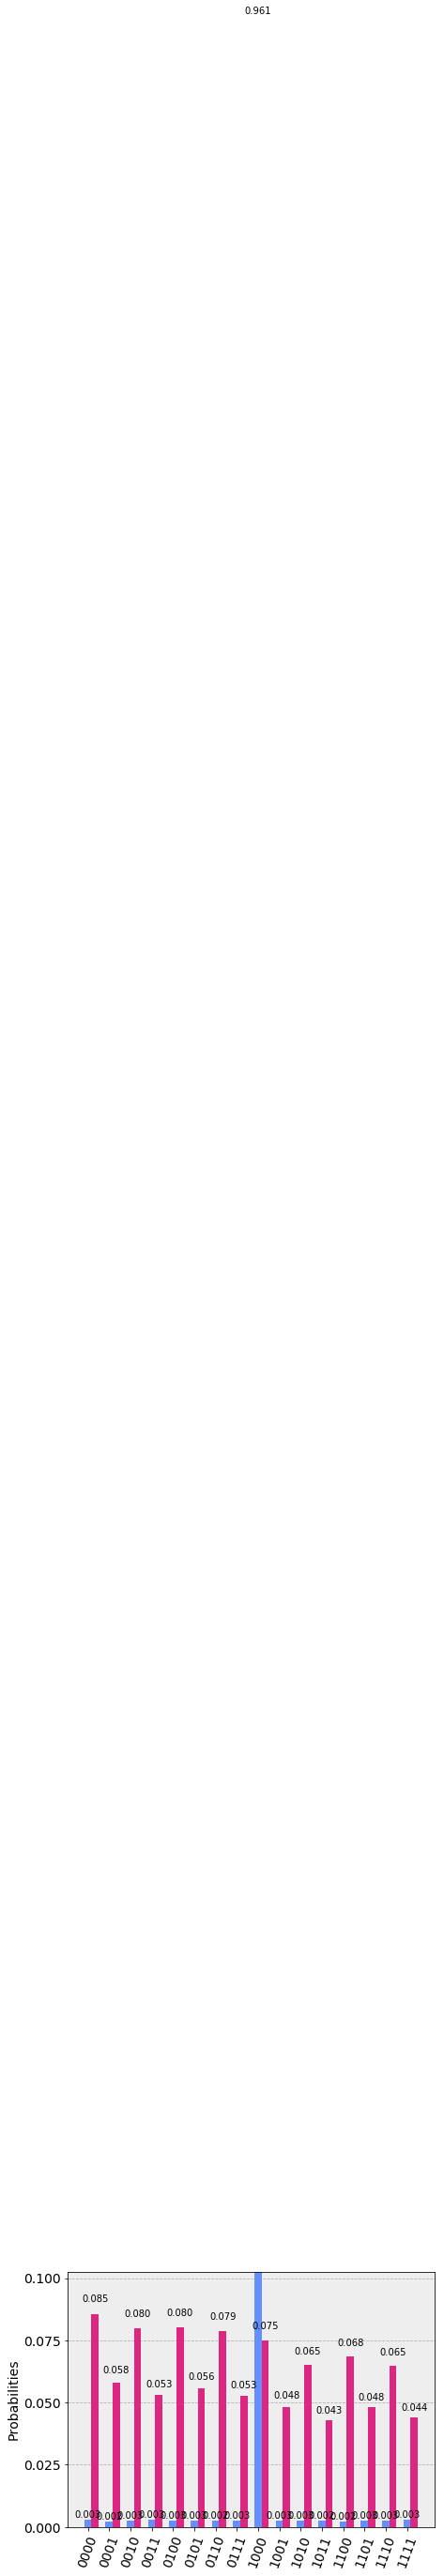

In [24]:
# Run in simulation
job = execute(qc, backend_sim, shots=100000)
result = job.result()
counts = result.get_counts(qc)

# Run on real quantum machine
job2 = execute(qc, backend, shots=8192, max_credits=3)
job_monitor(job2)
results2 = job2.result()
counts2 = results2.get_counts()

visualization.plot_histogram([counts,counts2])

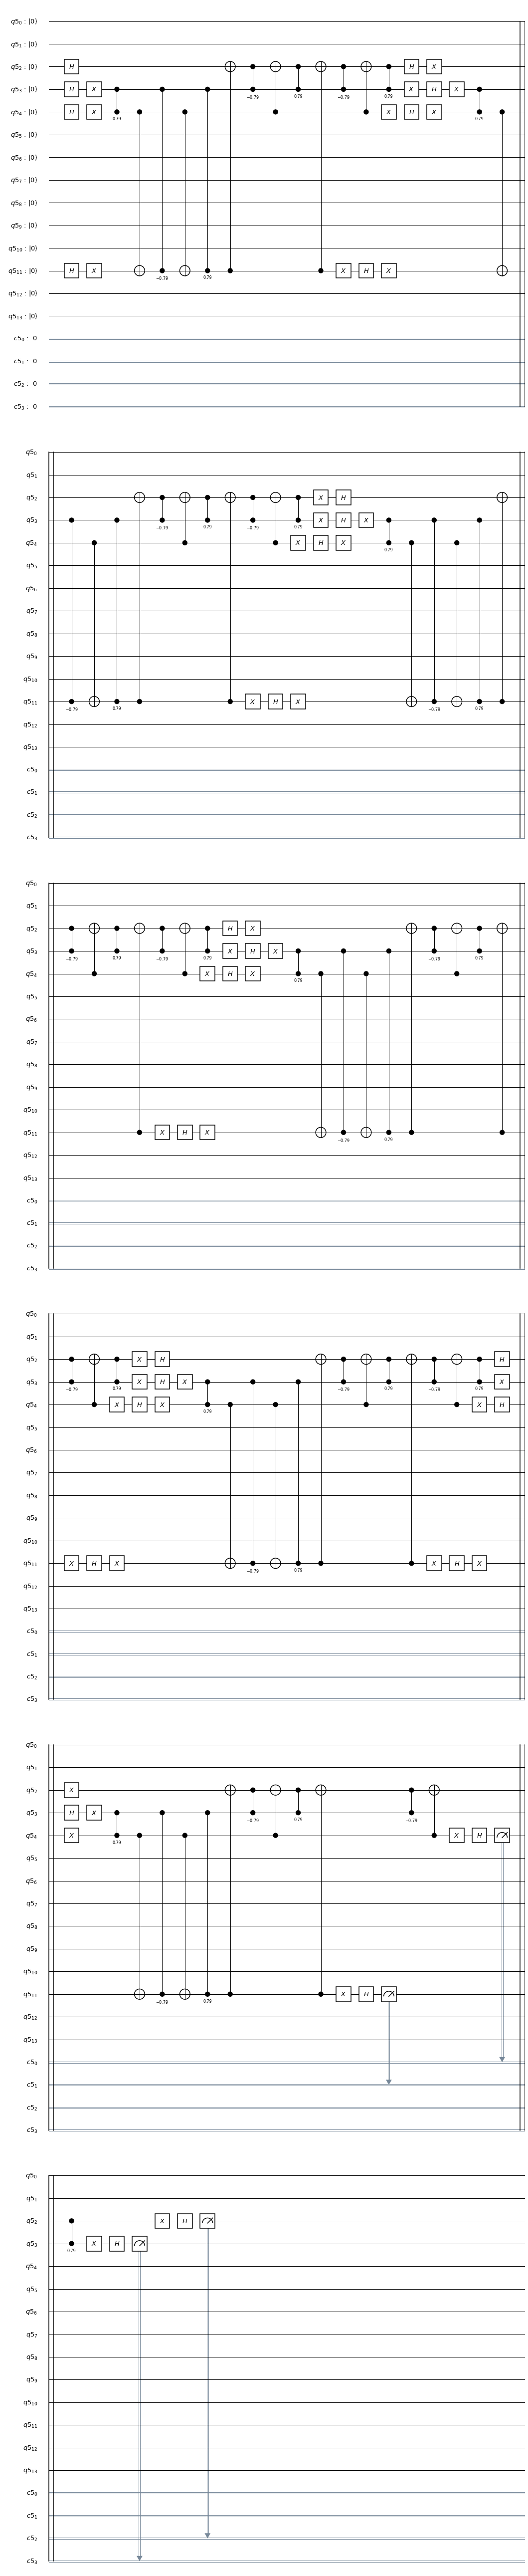

In [25]:
# N=4 Grover Search - Phase Oracle - Marked Item (0010) - Qubits: 2, 3, 4, 11 - Iterations: 3

qr = QuantumRegister(14)
cr = ClassicalRegister(4)
qc = QuantumCircuit(qr,cr)

# Initialization
qc.h(qr[4])
qc.h(qr[11])
qc.h(qr[2])
qc.h(qr[3])

# Oracle and Amplification
def repeat(): 
    # Oracle 
    qc.x(qr[4])
    qc.x(qr[11])
    qc.x(qr[3])
    
    # CCCZ
    cccz(4,11,2,3)
    
    qc.x(qr[4])
    qc.x(qr[11])
    qc.x(qr[3])
    
    # Amplification
    qc.h(qr[4])
    qc.h(qr[11])
    qc.h(qr[2])
    qc.h(qr[3])

    qc.x(qr[4])
    qc.x(qr[11])
    qc.x(qr[2])
    qc.x(qr[3])

    # CCCZ
    cccz(4,11,2,3)
    
    qc.x(qr[4])
    qc.x(qr[11])
    qc.x(qr[2])
    qc.x(qr[3])
    
    qc.h(qr[4])
    qc.h(qr[11])
    qc.h(qr[2])
    qc.h(qr[3])

for j in range(3):        
    repeat()


qc.measure(qr[4],cr[0])
qc.measure(qr[11],cr[1])
qc.measure(qr[2],cr[2])
qc.measure(qr[3],cr[3])

qc.draw(output ="mpl")

HTML(value="<p style='font-size:16px;'>Job Status: job is being initialized </p>")

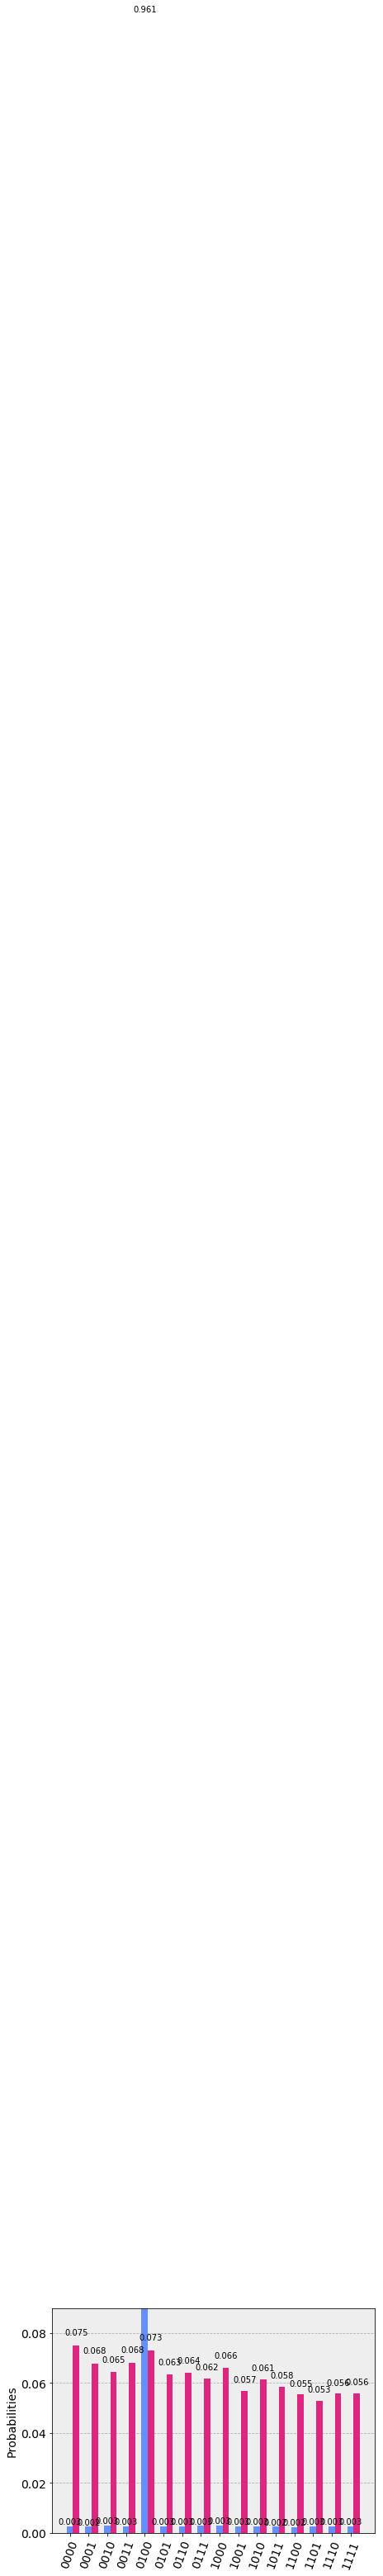

In [26]:
# Run in simulation
job = execute(qc, backend_sim, shots=100000)
result = job.result()
counts = result.get_counts(qc)

# Run on real quantum machine
job2 = execute(qc, backend, shots=8192, max_credits=3)
job_monitor(job2)
results2 = job2.result()
counts2 = results2.get_counts()

visualization.plot_histogram([counts,counts2])

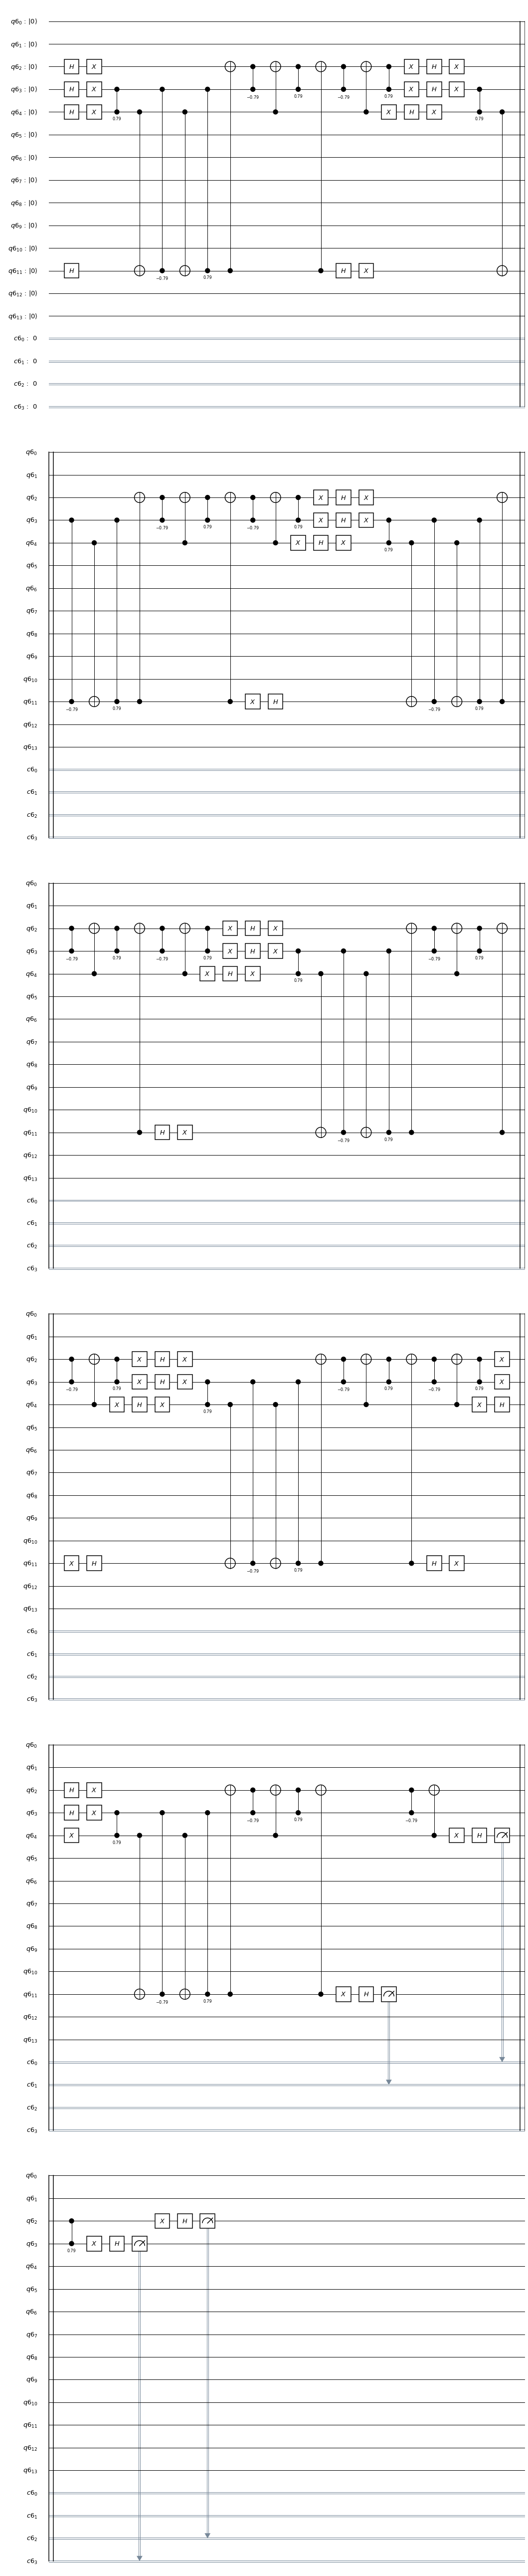

In [27]:
# N=4 Grover Search - Phase Oracle - Marked Item (0100) - Qubits: 2, 3, 4, 11 - Iterations: 3

qr = QuantumRegister(14)
cr = ClassicalRegister(4)
qc = QuantumCircuit(qr,cr)

# Initialization
qc.h(qr[4])
qc.h(qr[11])
qc.h(qr[2])
qc.h(qr[3])

# Oracle and Amplification
def repeat(): 
    # Oracle 
    qc.x(qr[4])
    qc.x(qr[2])
    qc.x(qr[3])
    
    # CCCZ
    cccz(4,11,2,3)
    
    qc.x(qr[4])
    qc.x(qr[2])
    qc.x(qr[3])
    
    # Amplification
    qc.h(qr[4])
    qc.h(qr[11])
    qc.h(qr[2])
    qc.h(qr[3])

    qc.x(qr[4])
    qc.x(qr[11])
    qc.x(qr[2])
    qc.x(qr[3])

    # CCCZ
    cccz(4,11,2,3)
    
    qc.x(qr[4])
    qc.x(qr[11])
    qc.x(qr[2])
    qc.x(qr[3])
    
    qc.h(qr[4])
    qc.h(qr[11])
    qc.h(qr[2])
    qc.h(qr[3])

for j in range(3):        
    repeat()


qc.measure(qr[4],cr[0])
qc.measure(qr[11],cr[1])
qc.measure(qr[2],cr[2])
qc.measure(qr[3],cr[3])

qc.draw(output ="mpl")

HTML(value="<p style='font-size:16px;'>Job Status: job is being initialized </p>")

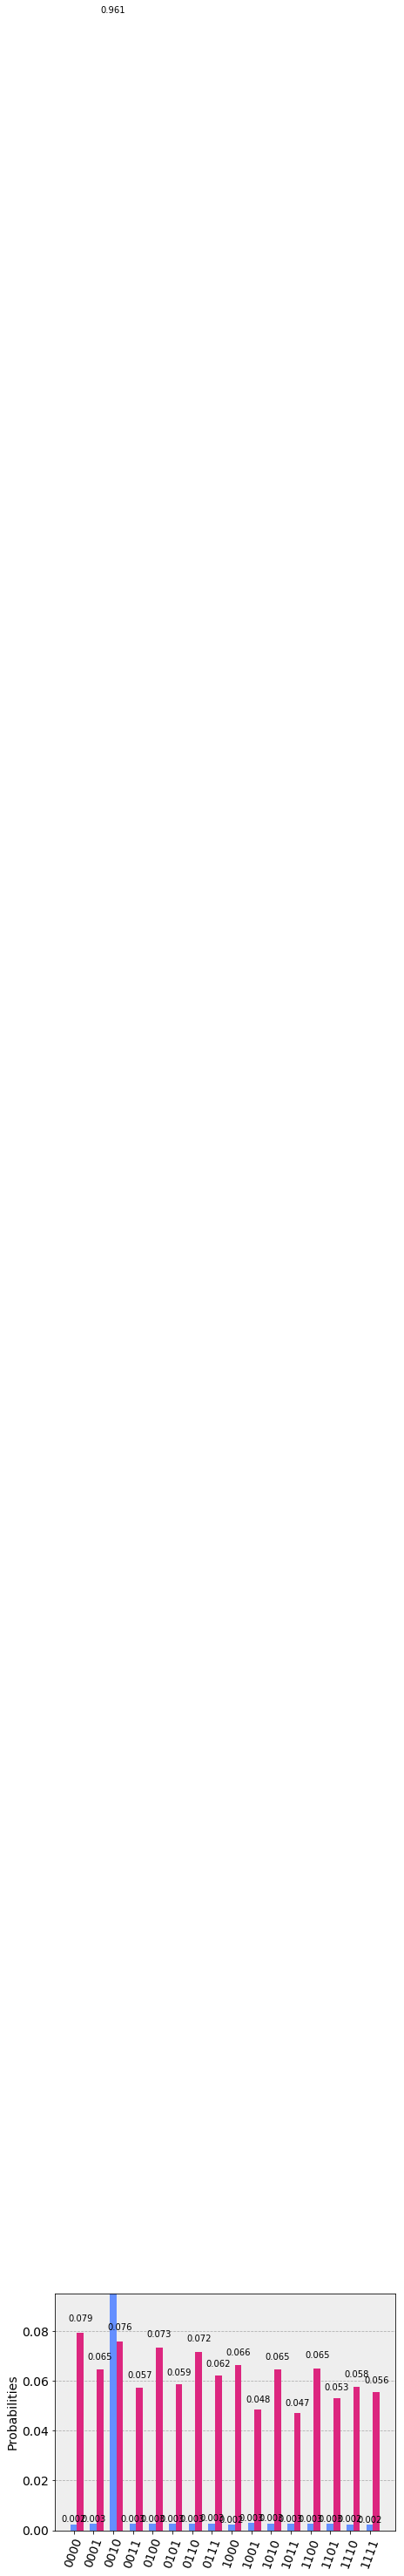

In [28]:
# Run in simulation
job = execute(qc, backend_sim, shots=100000)
result = job.result()
counts = result.get_counts(qc)

# Run on real quantum machine
job2 = execute(qc, backend, shots=8192, max_credits=3)
job_monitor(job2)
results2 = job2.result()
counts2 = results2.get_counts()

visualization.plot_histogram([counts,counts2])

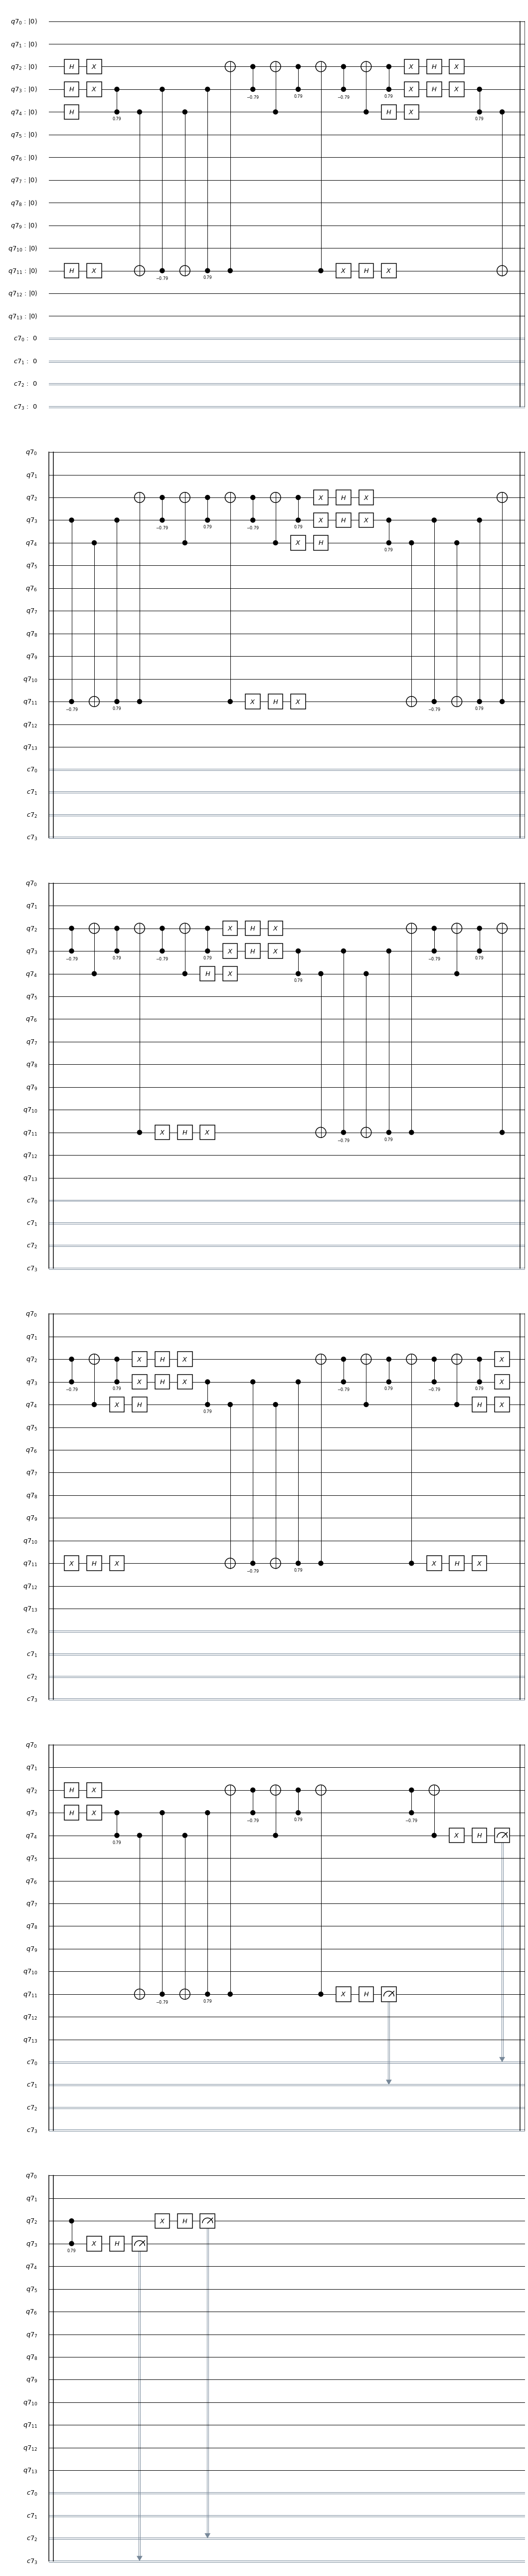

In [29]:
# N=4 Grover Search - Phase Oracle - Marked Item (1000) - Qubits: 2, 3, 4, 11 - Iterations: 3

qr = QuantumRegister(14)
cr = ClassicalRegister(4)
qc = QuantumCircuit(qr,cr)

# Initialization
qc.h(qr[4])
qc.h(qr[11])
qc.h(qr[2])
qc.h(qr[3])

# Oracle and Amplification
def repeat(): 
    # Oracle 
    qc.x(qr[11])
    qc.x(qr[2])
    qc.x(qr[3])
    
    # CCCZ
    cccz(4,11,2,3)
    
    qc.x(qr[11])
    qc.x(qr[2])
    qc.x(qr[3])
    
    # Amplification
    qc.h(qr[4])
    qc.h(qr[11])
    qc.h(qr[2])
    qc.h(qr[3])

    qc.x(qr[4])
    qc.x(qr[11])
    qc.x(qr[2])
    qc.x(qr[3])

    # CCCZ
    cccz(4,11,2,3)
    
    qc.x(qr[4])
    qc.x(qr[11])
    qc.x(qr[2])
    qc.x(qr[3])
    
    qc.h(qr[4])
    qc.h(qr[11])
    qc.h(qr[2])
    qc.h(qr[3])

for j in range(3):        
    repeat()


qc.measure(qr[4],cr[0])
qc.measure(qr[11],cr[1])
qc.measure(qr[2],cr[2])
qc.measure(qr[3],cr[3])

qc.draw(output ="mpl")

HTML(value="<p style='font-size:16px;'>Job Status: job is being initialized </p>")

Got a 502 code response to /api/Jobs/5c75e091acdc760057f95d37/status: 502 Bad Gateway: Registered endpoint failed to handle the request.

Got a 502 code response to /api/Jobs/5c75e091acdc760057f95d37/status: 502 Bad Gateway: Registered endpoint failed to handle the request.

Got a 502 code response to /api/Jobs/5c75e091acdc760057f95d37/status: 502 Bad Gateway: Registered endpoint failed to handle the request.



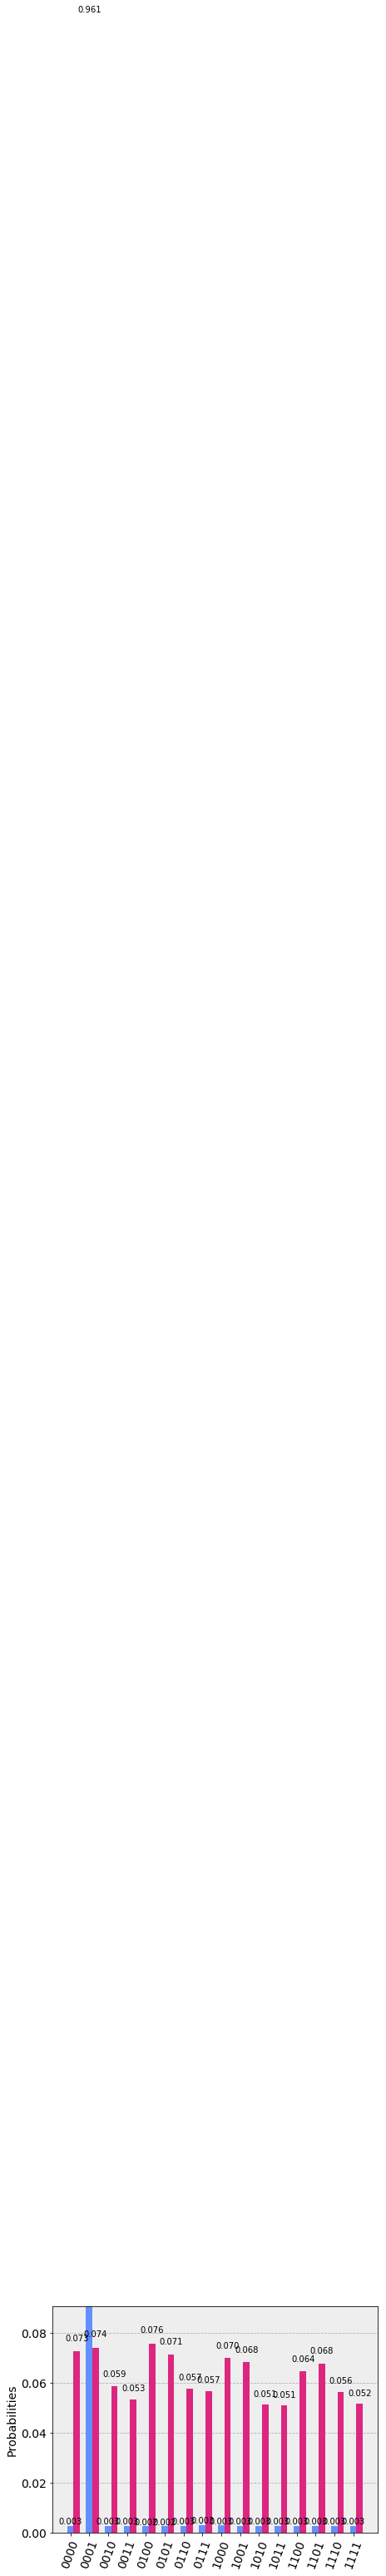

In [30]:
# Run in simulation
job = execute(qc, backend_sim, shots=100000)
result = job.result()
counts = result.get_counts(qc)

# Run on real quantum machine
job2 = execute(qc, backend, shots=8192, max_credits=3)
job_monitor(job2)
results2 = job2.result()
counts2 = results2.get_counts()

visualization.plot_histogram([counts,counts2])

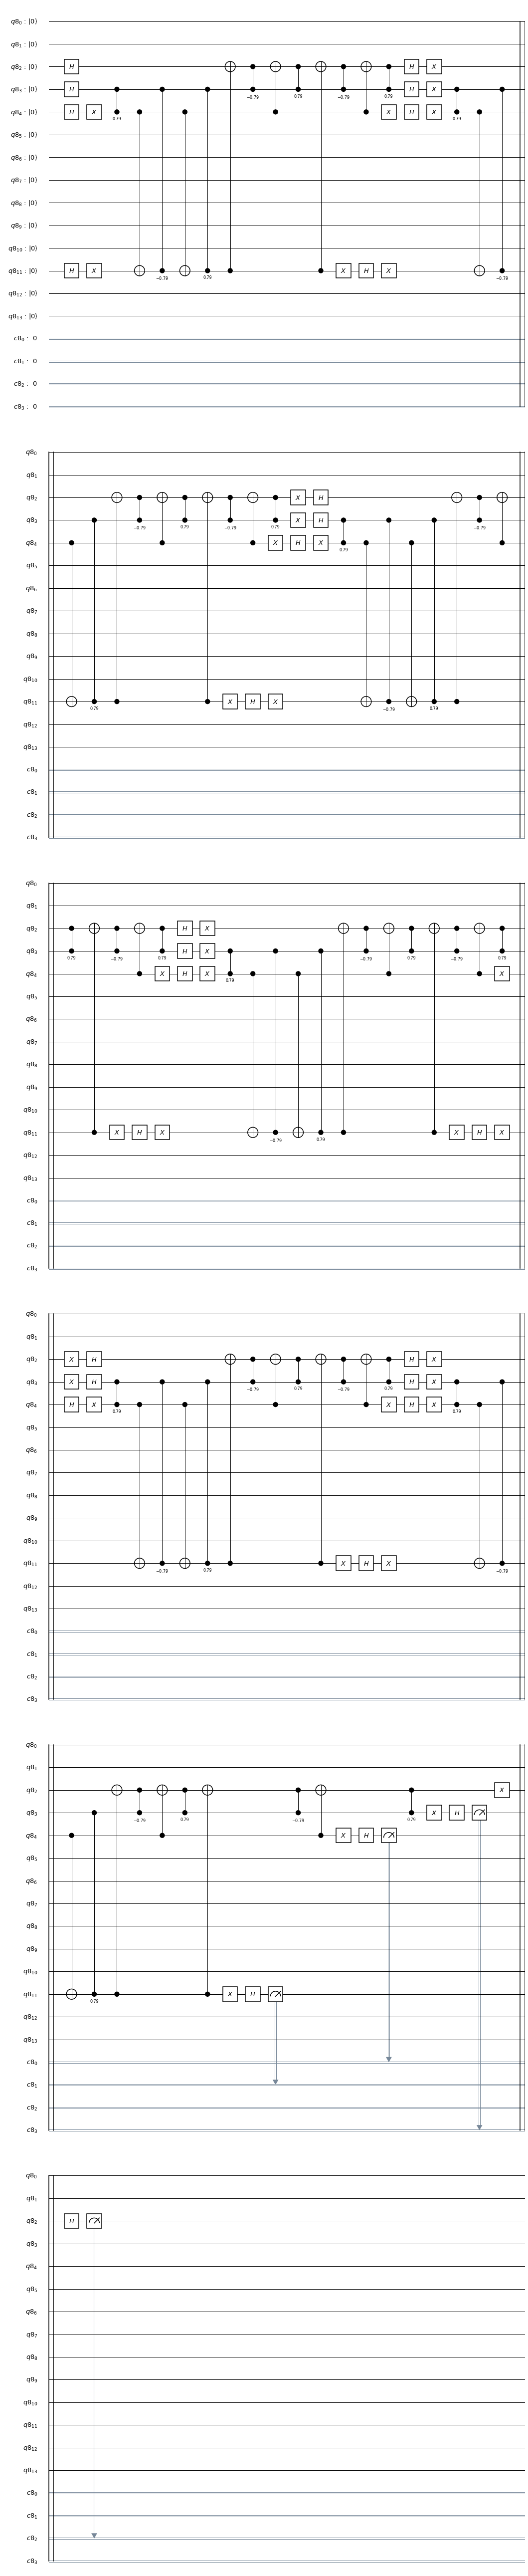

In [31]:
# N=4 Grover Search - Phase Oracle - Marked Item (0011) - Qubits: 2, 3, 4, 11 - Iterations: 3

qr = QuantumRegister(14)
cr = ClassicalRegister(4)
qc = QuantumCircuit(qr,cr)

# Initialization
qc.h(qr[4])
qc.h(qr[11])
qc.h(qr[2])
qc.h(qr[3])

# Oracle and Amplification
def repeat(): 
    # Oracle 
    qc.x(qr[4])
    qc.x(qr[11])
    
    # CCCZ
    cccz(4,11,2,3)
    
    qc.x(qr[4])
    qc.x(qr[11])
    
    # Amplification
    qc.h(qr[4])
    qc.h(qr[11])
    qc.h(qr[2])
    qc.h(qr[3])

    qc.x(qr[4])
    qc.x(qr[11])
    qc.x(qr[2])
    qc.x(qr[3])

    # CCCZ
    cccz(4,11,2,3)
    
    qc.x(qr[4])
    qc.x(qr[11])
    qc.x(qr[2])
    qc.x(qr[3])
    
    qc.h(qr[4])
    qc.h(qr[11])
    qc.h(qr[2])
    qc.h(qr[3])

for j in range(3):        
    repeat()


qc.measure(qr[4],cr[0])
qc.measure(qr[11],cr[1])
qc.measure(qr[2],cr[2])
qc.measure(qr[3],cr[3])

qc.draw(output ="mpl")

HTML(value="<p style='font-size:16px;'>Job Status: job is being initialized </p>")

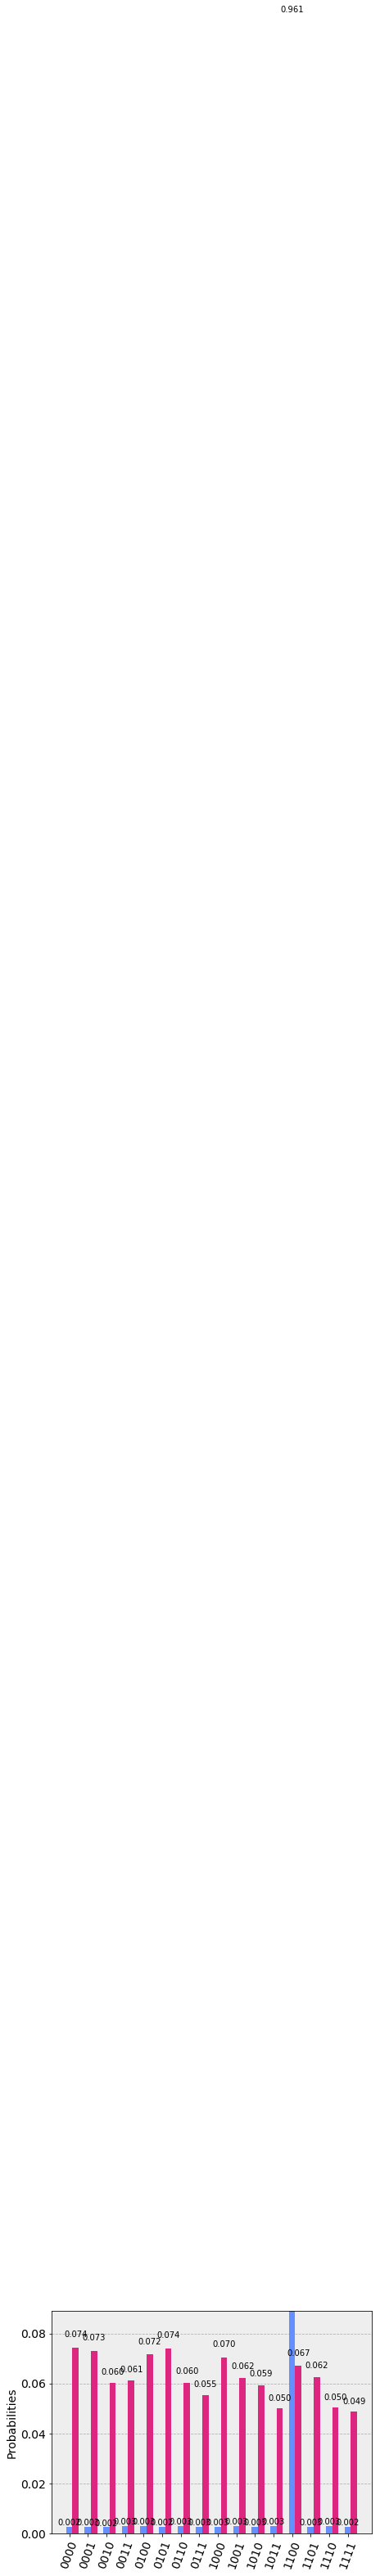

In [32]:
# Run in simulation
job = execute(qc, backend_sim, shots=100000)
result = job.result()
counts = result.get_counts(qc)

# Run on real quantum machine
job2 = execute(qc, backend, shots=8192, max_credits=3)
job_monitor(job2)
results2 = job2.result()
counts2 = results2.get_counts()

visualization.plot_histogram([counts,counts2])

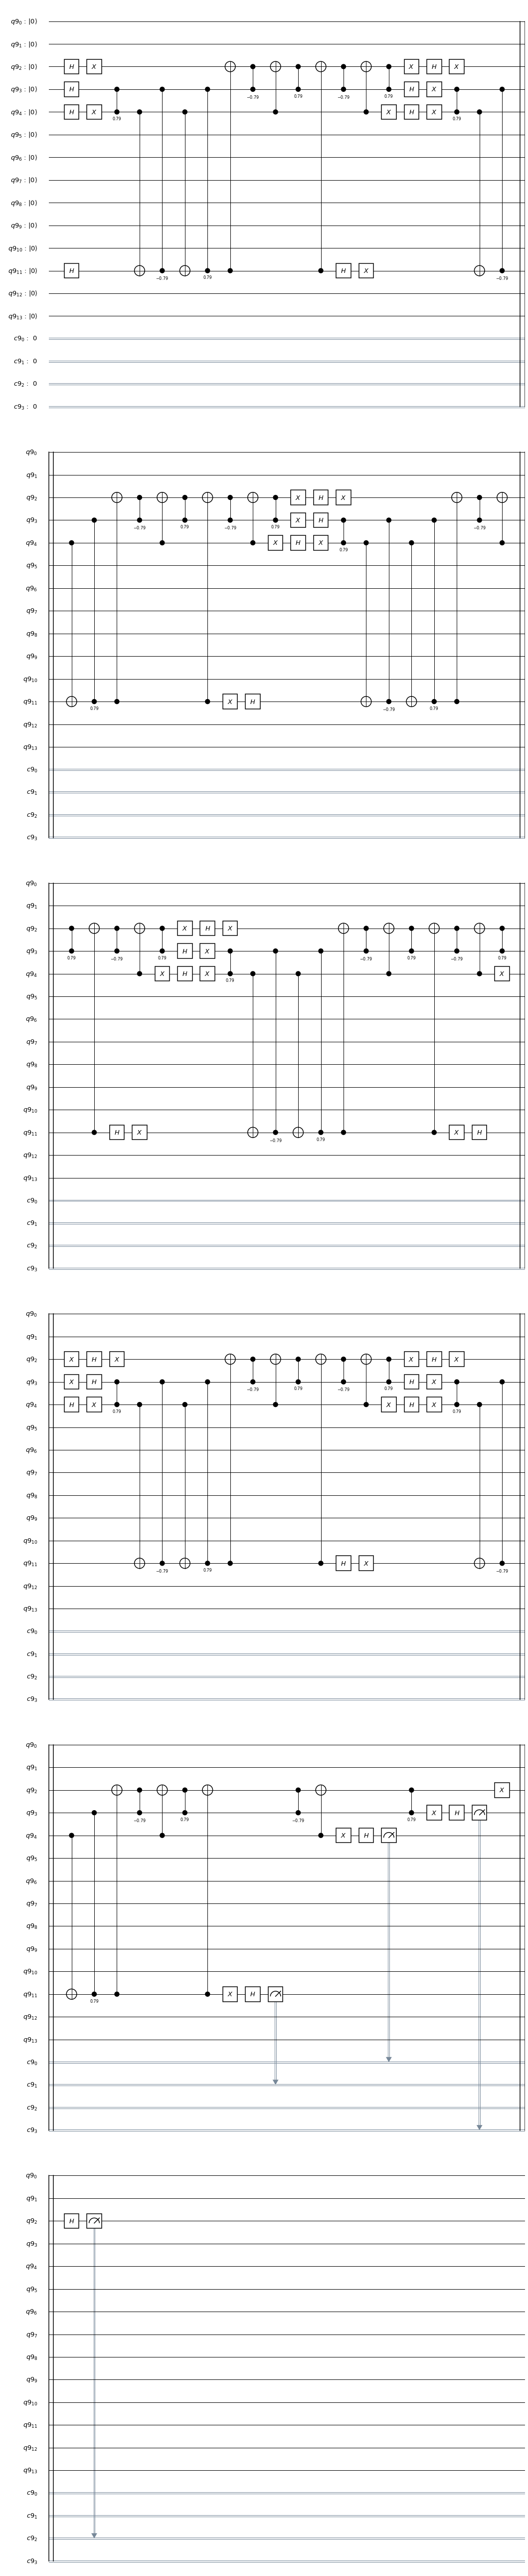

In [33]:
# N=4 Grover Search - Phase Oracle - Marked Item (0101) - Qubits: 2, 3, 4, 11 - Iterations: 3

qr = QuantumRegister(14)
cr = ClassicalRegister(4)
qc = QuantumCircuit(qr,cr)

# Initialization
qc.h(qr[4])
qc.h(qr[11])
qc.h(qr[2])
qc.h(qr[3])

# Oracle and Amplification
def repeat(): 
    # Oracle 
    qc.x(qr[4])
    qc.x(qr[2])

    
    # CCCZ
    cccz(4,11,2,3)
    
    qc.x(qr[4])
    qc.x(qr[2])
    
    # Amplification
    qc.h(qr[4])
    qc.h(qr[11])
    qc.h(qr[2])
    qc.h(qr[3])

    qc.x(qr[4])
    qc.x(qr[11])
    qc.x(qr[2])
    qc.x(qr[3])

    # CCCZ
    cccz(4,11,2,3)
    
    qc.x(qr[4])
    qc.x(qr[11])
    qc.x(qr[2])
    qc.x(qr[3])
    
    qc.h(qr[4])
    qc.h(qr[11])
    qc.h(qr[2])
    qc.h(qr[3])

for j in range(3):        
    repeat()


qc.measure(qr[4],cr[0])
qc.measure(qr[11],cr[1])
qc.measure(qr[2],cr[2])
qc.measure(qr[3],cr[3])

qc.draw(output ="mpl")

HTML(value="<p style='font-size:16px;'>Job Status: job is being initialized </p>")

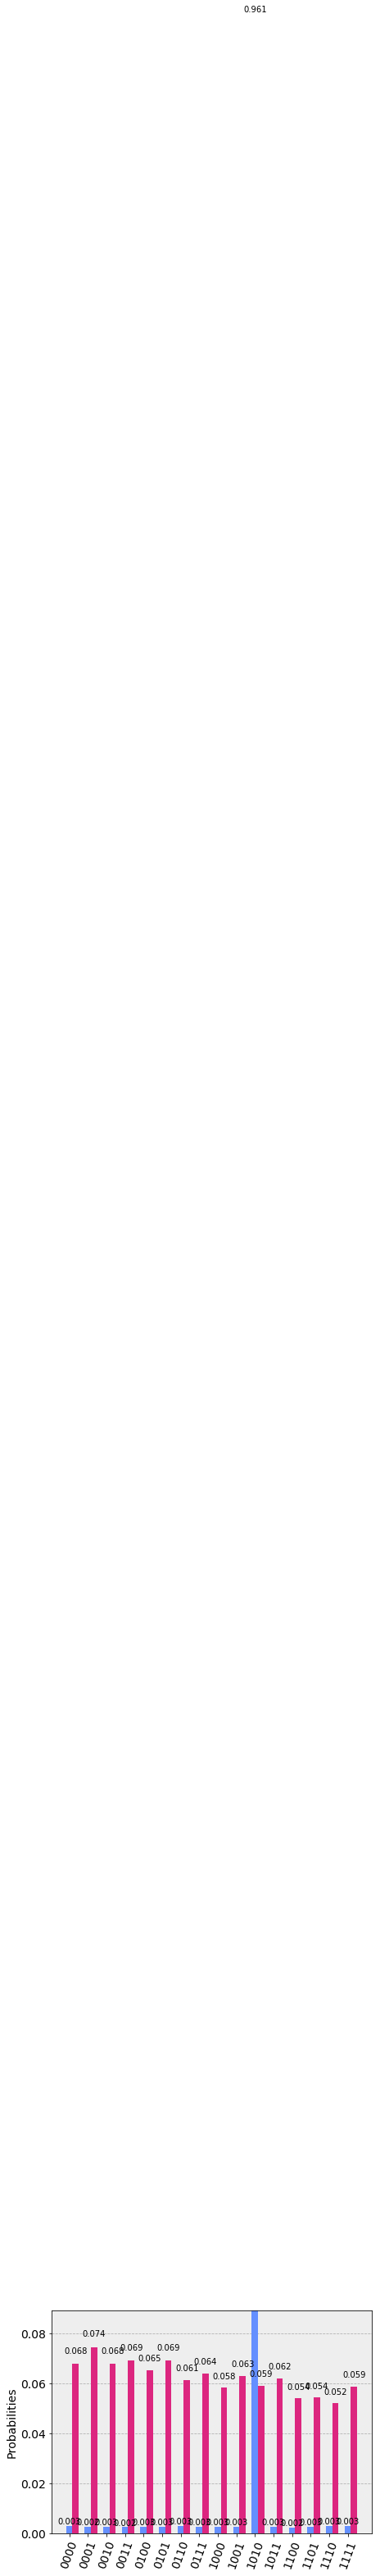

In [34]:
# Run in simulation
job = execute(qc, backend_sim, shots=100000)
result = job.result()
counts = result.get_counts(qc)

# Run on real quantum machine
job2 = execute(qc, backend, shots=8192, max_credits=3)
job_monitor(job2)
results2 = job2.result()
counts2 = results2.get_counts()

visualization.plot_histogram([counts,counts2])

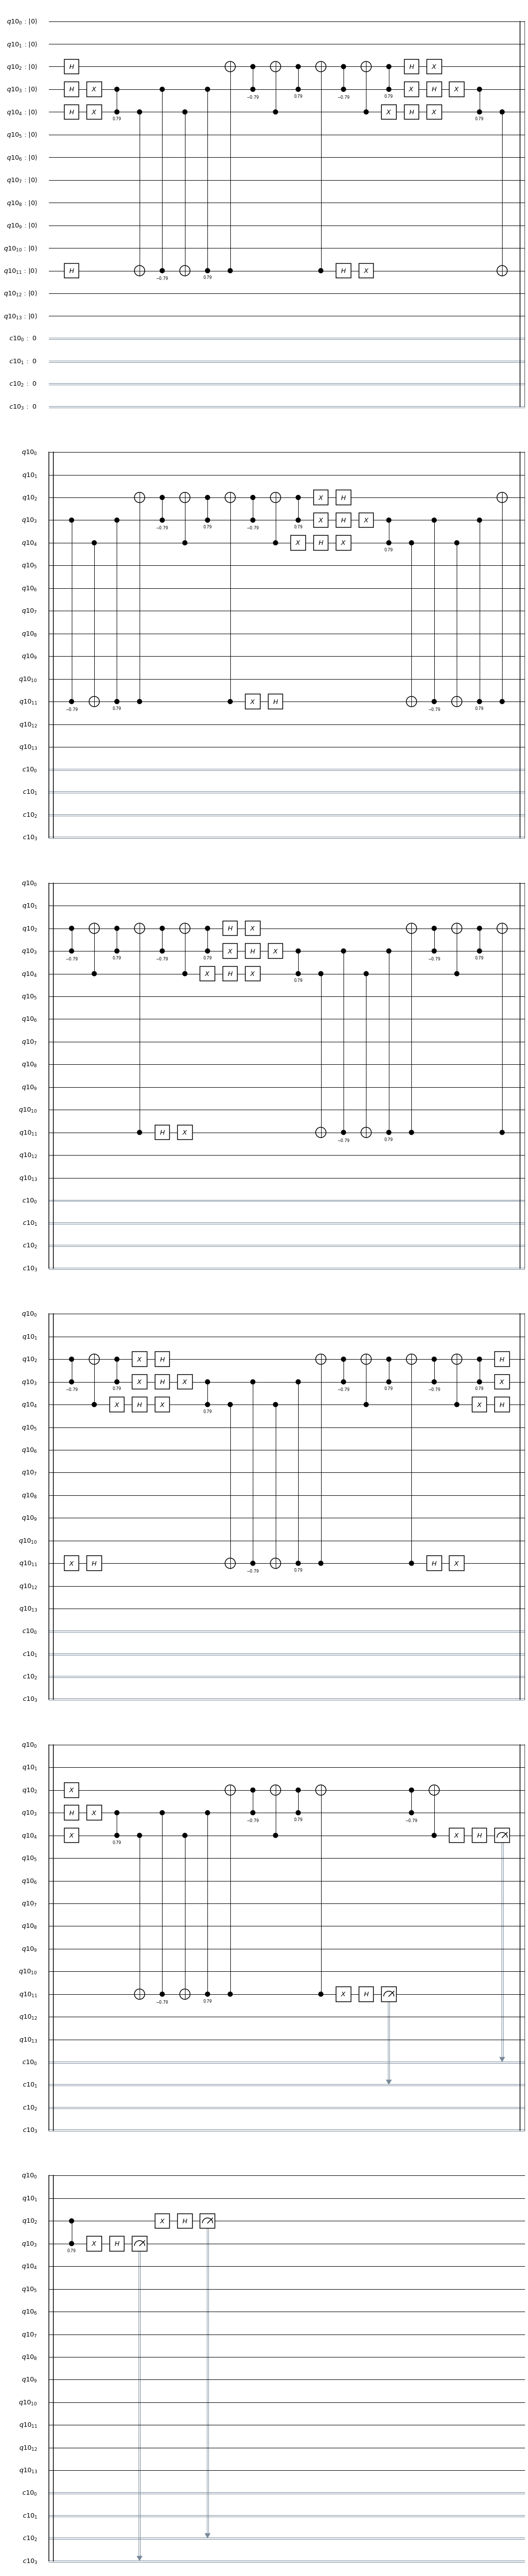

In [35]:
# N=4 Grover Search - Phase Oracle - Marked Item (0110) - Qubits: 2, 3, 4, 11 - Iterations: 3

qr = QuantumRegister(14)
cr = ClassicalRegister(4)
qc = QuantumCircuit(qr,cr)

# Initialization
qc.h(qr[4])
qc.h(qr[11])
qc.h(qr[2])
qc.h(qr[3])

# Oracle and Amplification
def repeat(): 
    # Oracle 
    qc.x(qr[4])
    qc.x(qr[3])
    
    # CCCZ
    cccz(4,11,2,3)
    
    qc.x(qr[4])
    qc.x(qr[3])
    
    # Amplification
    qc.h(qr[4])
    qc.h(qr[11])
    qc.h(qr[2])
    qc.h(qr[3])

    qc.x(qr[4])
    qc.x(qr[11])
    qc.x(qr[2])
    qc.x(qr[3])

    # CCCZ
    cccz(4,11,2,3)
    
    qc.x(qr[4])
    qc.x(qr[11])
    qc.x(qr[2])
    qc.x(qr[3])
    
    qc.h(qr[4])
    qc.h(qr[11])
    qc.h(qr[2])
    qc.h(qr[3])

for j in range(3):        
    repeat()


qc.measure(qr[4],cr[0])
qc.measure(qr[11],cr[1])
qc.measure(qr[2],cr[2])
qc.measure(qr[3],cr[3])

qc.draw(output ="mpl")

HTML(value="<p style='font-size:16px;'>Job Status: job is being initialized </p>")

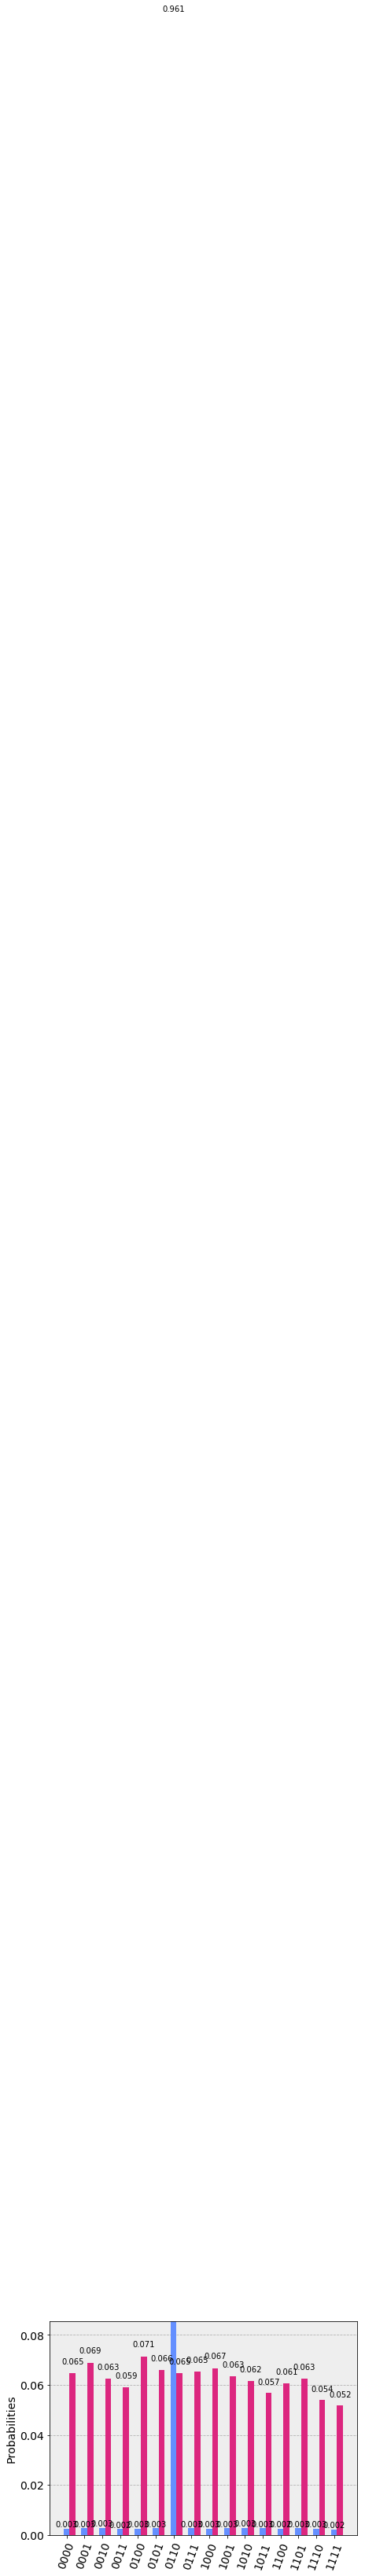

In [36]:
# Run in simulation
job = execute(qc, backend_sim, shots=100000)
result = job.result()
counts = result.get_counts(qc)

# Run on real quantum machine
job2 = execute(qc, backend, shots=8192, max_credits=3)
job_monitor(job2)
results2 = job2.result()
counts2 = results2.get_counts()

visualization.plot_histogram([counts,counts2])